# 1. Introduction

This project analyzes Amazon sales data to uncover business insights related to product performance, regional trends, customer behavior, and payment preferences. The dataset includes key attributes like order details, sales, profit, discounts, and payment methods.

The goal is to identify patterns in sales performance, profit margins, and customer buying behavior using Exploratory Data Analysis (EDA). By leveraging SQL for data cleaning and Python for data visualization, this project demonstrates practical skills in business analytics, storytelling with data, and drawing actionable insights — all essential for data-driven decision-making roles.

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Dataset Overview

In [22]:
df=pd.read_csv("/Users/ankitpal/Documents/PROJECTS/Amazon sales sql/amazon_sales_raw_data.csv")

In [23]:
df_copy=df.copy()

In [24]:
df_copy

,Order ID,Order Date,Customer Name,Region,Category,Product Name,Quantity,Unit Price,Payment Method,Sales,Profit,Discount,Net Sales,Profit Margin
0,d025b9dd-37cd-4b3c-8196-6028757050c4,2024-08-03,Joshua Arroyo,North,Electronics,She Gadget,3,248.73,COD,746.19,93.205118,33.897320,712.292680,0.124908
1,7ad24d20-eaba-4e0a-989d-95bce4cfc16c,2025-02-15,Jennifer Bean,North,Clothing,Field Pack,4,200.77,Debit Card,803.08,192.853929,42.249404,760.830596,0.240143
2,e2da7f9d-0f59-451b-afd8-261e89e53a1b,2025-02-22,Annette Perez,East,Books,Friend Gadget,3,220.51,Upi,661.53,129.923690,57.493086,604.036914,0.196399
3,10a6a22e-6eee-4ded-8b4b-8b2f69e87428,2024-12-30,Ricky Andrews,South,Beauty,Big Pack,1,396.41,cod,396.41,67.283342,16.094402,380.315598,0.169732
4,2263fa62-8003-495d-b366-b1da9f023619,2025-04-14,Leslie Turner,South,Toys,Pattern Gadget,4,27.95,UPI,111.80,9.078577,9.868415,101.931585,0.081204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,7b7de6b2-b902-4d37-a4c5-2935242cfdd0,2025-01-02,Maria Massey,South,Home & Kitchen,Happy Gadget,3,423.71,Upi,1271.13,262.781471,20.179072,1250.950928,0.206731
5001,3a1a35ef-4f62-428a-b797-4bb990c8f820,2024-09-25,Stacey Henderson,South,Sports,Scene Item,1,71.32,Net Banking,71.32,12.503716,4.625252,66.694748,0.175319
5002,ab2a0ff6-b98e-49a6-80b1-457bab7cf50f,2024-07-28,Sheila Larsen,East,Books,Himself Item,2,52.71,Debit Card,105.42,22.533319,5.615803,99.804197,0.213748
5003,11073f46-817b-456e-9de6-9cce8116e847,2025-02-12,Zachary Jackson,West,Sports,Suffer Item,1,29.92,Upi,29.92,5.304226,0.808513,29.111487,0.177280


In [29]:
df_copy.shape

(5005, 14)

In [31]:
df_copy.describe()

,Quantity,Unit Price,Sales,Profit,Discount,Net Sales,Profit Margin
count,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000
mean,2.992408,254.860378,760.668755,113.807929,41.475613,719.193142,0.149408
std,1.401418,144.327686,588.429269,105.136878,40.530628,556.789760,0.057915
min,1.000000,5.260000,5.260000,0.326928,0.077346,5.043685,0.050002
25%,2.000000,126.150000,283.420000,36.189841,11.388388,268.540657,0.099070
50%,3.000000,259.780000,612.990000,81.405352,28.093476,579.699071,0.150056
75%,4.000000,381.410000,1148.440000,161.276182,59.287644,1089.608403,0.199637
max,5.000000,499.640000,2494.550000,612.958351,235.221882,2432.568642,0.249944


## 3.Data cleaning and preprocessing

### ->Checking Null values

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        5005 non-null   object 
 1   Order Date      5005 non-null   object 
 2   Customer Name   4995 non-null   object 
 3   Region          5005 non-null   object 
 4   Category        4955 non-null   object 
 5   Product Name    5005 non-null   object 
 6   Quantity        5005 non-null   int64  
 7   Unit Price      5005 non-null   float64
 8   Payment Method  4955 non-null   object 
 9   Sales           5005 non-null   float64
 10  Profit          5005 non-null   float64
 11  Discount        5005 non-null   float64
 12  Net Sales       5005 non-null   float64
 13  Profit Margin   5005 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 547.6+ KB


In [37]:
df.isnull().sum()

Order ID           0
Order Date         0
Customer Name     10
Region             0
Category          50
Product Name       0
Quantity           0
Unit Price         0
Payment Method    50
Sales              0
Profit             0
Discount           0
Net Sales          0
Profit Margin      0
dtype: int64

In [39]:
df['Quantity'].unique()

array([3, 4, 1, 5, 2])

## Importing clean dataset from sql

In [42]:
import mysql.connector
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hemant@123",
    database="amazon_sales"
)

# Pull data directly into a DataFrame
query = "SELECT * FROM amazon_sales_raw_data"
df_clean = pd.read_sql(query, conn)

conn.close()

# Show the first few rows
print(df.head())

# Show column names
print(df.columns)

                               Order ID  Order Date  Customer Name Region  \
0  d025b9dd-37cd-4b3c-8196-6028757050c4  2024-08-03  Joshua Arroyo  North   
1  7ad24d20-eaba-4e0a-989d-95bce4cfc16c  2025-02-15  Jennifer Bean  North   
2  e2da7f9d-0f59-451b-afd8-261e89e53a1b  2025-02-22  Annette Perez   East   
3  10a6a22e-6eee-4ded-8b4b-8b2f69e87428  2024-12-30  Ricky Andrews  South   
4  2263fa62-8003-495d-b366-b1da9f023619  2025-04-14  Leslie Turner  South   

      Category    Product Name  Quantity  Unit Price Payment Method   Sales  \
0  Electronics      She Gadget         3      248.73            COD  746.19   
1     Clothing      Field Pack         4      200.77     Debit Card  803.08   
2        Books   Friend Gadget         3      220.51            Upi  661.53   
3       Beauty        Big Pack         1      396.41            cod  396.41   
4         Toys  Pattern Gadget         4       27.95            UPI  111.80   

       Profit   Discount   Net Sales  Profit Margin  
0   93.2

/var/folders/j4/htmrvpps6zsd2xb32h6w424m0000gn/T/ipykernel_6851/1780063761.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_clean = pd.read_sql(query, conn)


In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        5005 non-null   object 
 1   Customer Name   5005 non-null   object 
 2   Region          5005 non-null   object 
 3   Category        5005 non-null   object 
 4   Product Name    5005 non-null   object 
 5   Quantity        5005 non-null   int64  
 6   Unit Price      5005 non-null   float64
 7   Payment Method  5005 non-null   object 
 8   Sales           5005 non-null   float64
 9   Profit          5005 non-null   float64
 10  Discount        5005 non-null   float64
 11  Net Sales       5005 non-null   float64
 12  Profit Margin   5005 non-null   float64
 13  Order_Date      5005 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 547.6+ KB


### ->Removing duplicate values

In [47]:
df_clean.shape

(5005, 14)

In [49]:
df_clean.duplicated().sum()

5

In [51]:
df_clean.drop_duplicates(inplace=True)

In [53]:
df_clean.duplicated().sum()

0

In [55]:
df_clean.shape

(5000, 14)

# 4.Explolatary Data Analysis

## -Sales and Profit trend over time

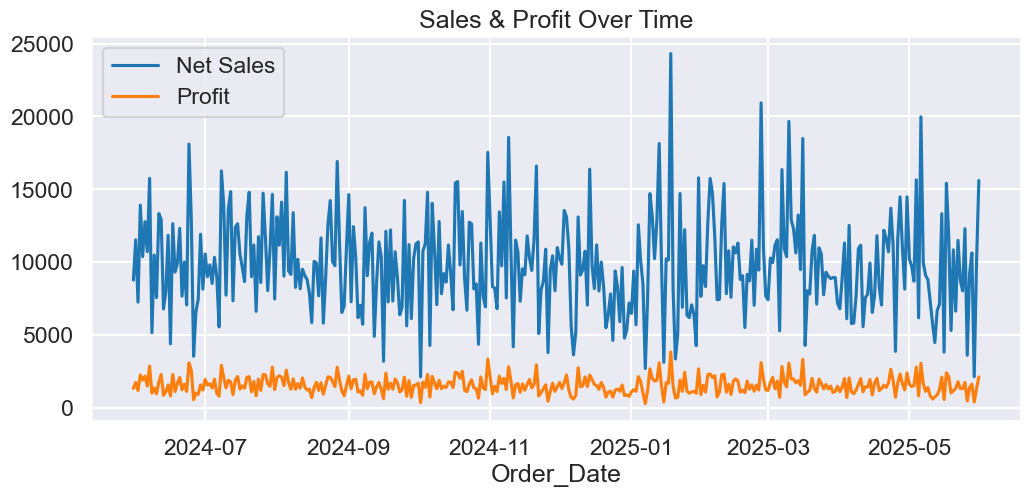

In [148]:
df_clean.groupby('Order_Date')[['Net Sales', 'Profit']].sum().plot(figsize=(12,5))
plt.title("Sales & Profit Over Time")
plt.show()

## -Top 10 selling products on Amazon

In [218]:
top_sell=df_clean.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_sell

Product Name
Section Gadget    5937.49
Hear Set          5921.55
Bit Gadget        5672.84
Citizen Tool      5339.68
Stock Item        5276.67
Rock Pack         5253.97
Stay Set          5234.28
Central Item      5227.01
Prepare Set       5100.36
Fire Tool         4950.65
Name: Sales, dtype: float64

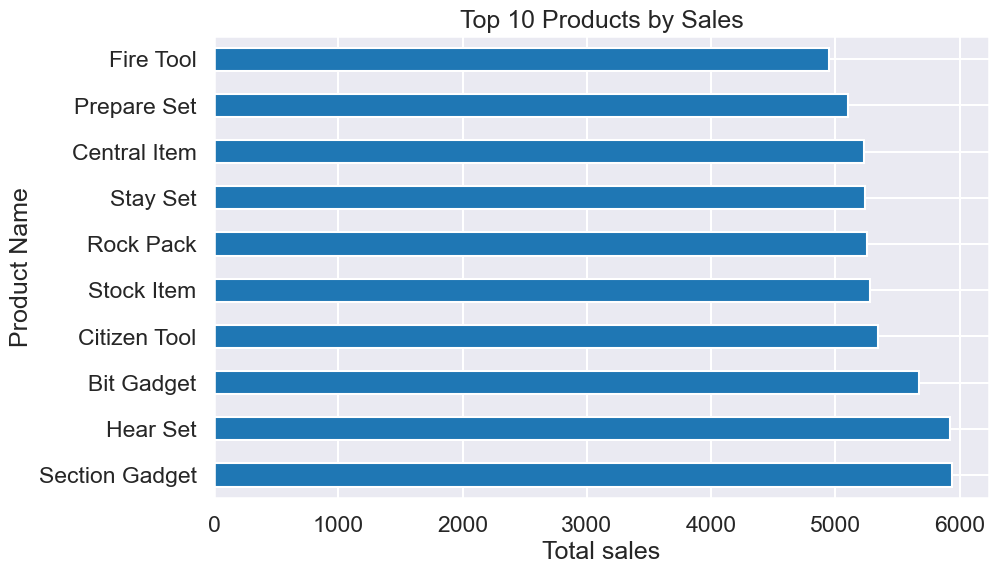

In [222]:
top_sell.plot(kind='barh',figsize=(10,6))
plt.title("Top 10 Products by Sales")
plt.xlabel('Total sales')
plt.show()

## -Sales in different Regions

In [224]:
top_region=df_clean.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
top_region

,Sales,Profit
Region,,
West,800413.67,120880.042522
Central,757451.29,115254.035940
East,760871.75,112906.401866
South,746756.94,111320.494418
North,740001.23,108912.448808


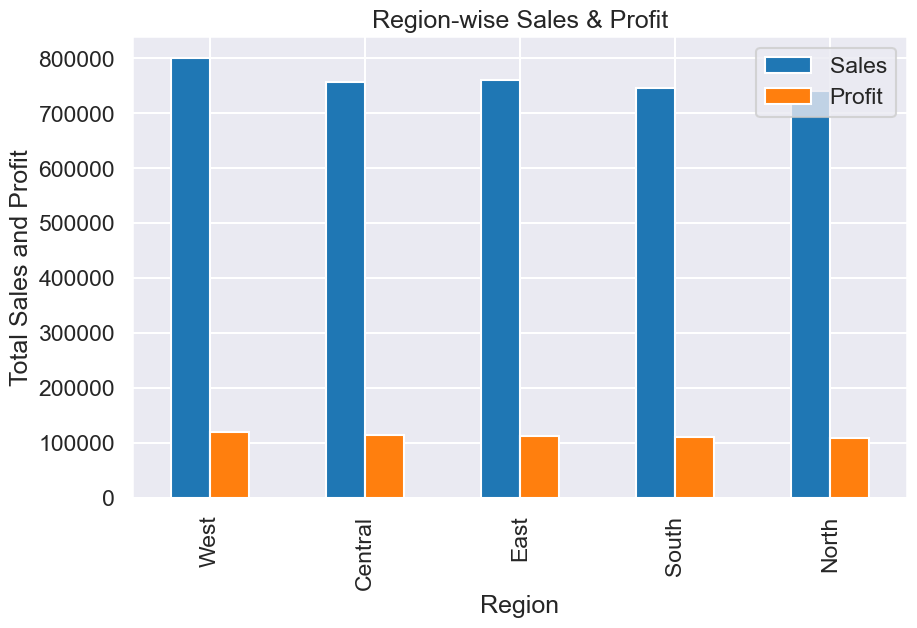

In [226]:
top_region.plot(kind='bar',figsize=(10,6))
plt.title("Region-wise Sales & Profit")
plt.ylabel('Total Sales and Profit')
plt.show()

## -Net sales and Profit in different categories

In [229]:
top_profit=df_clean.groupby('Category')[['Net Sales', 'Profit']].sum()
top_profit

,Net Sales,Profit
Category,,
Beauty,518791.491740,81945.923501
Books,511923.216262,80743.401883
Clothing,514128.385495,82367.368001
Electronics,508173.110449,81072.132867
Home & Kitchen,513759.637842,79384.572320
Sports,472496.342605,72745.881386
Toys,526646.281588,86219.754264
Unknown,32030.910697,4794.389332


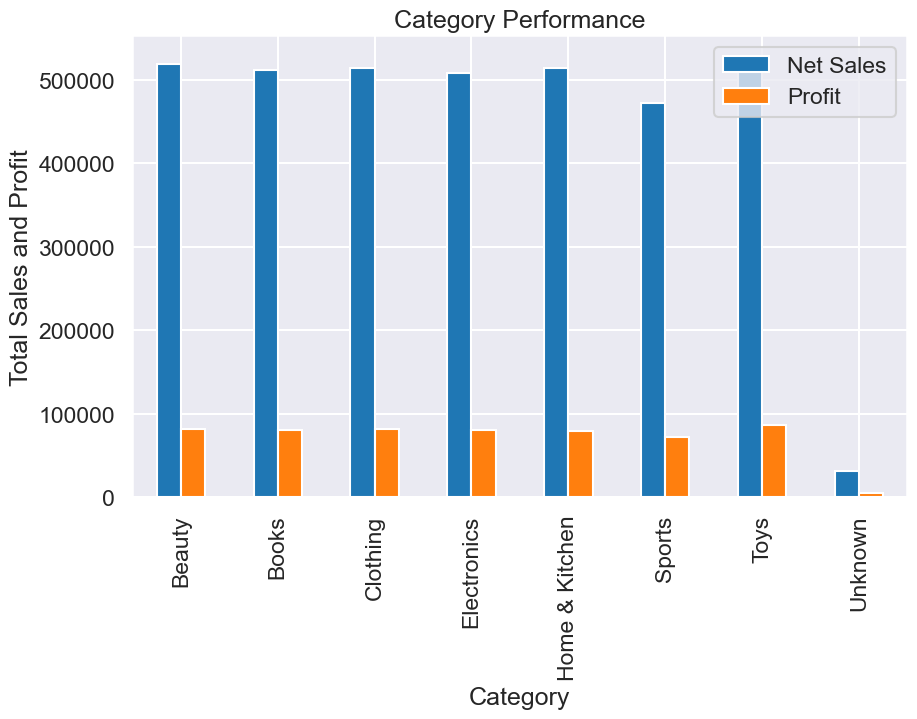

In [231]:
top_profit.plot(kind='bar',figsize=(10,6))
plt.title("Category Performance")
plt.ylabel('Total Sales and Profit')
plt.show()

## -Most used Payment Method

In [234]:
most_pay=df_clean['Payment Method'].value_counts()
most_pay

Payment Method
COD            1700
UPI            1612
Net Banking     591
Credit Card     587
Debit Card      510
Name: count, dtype: int64

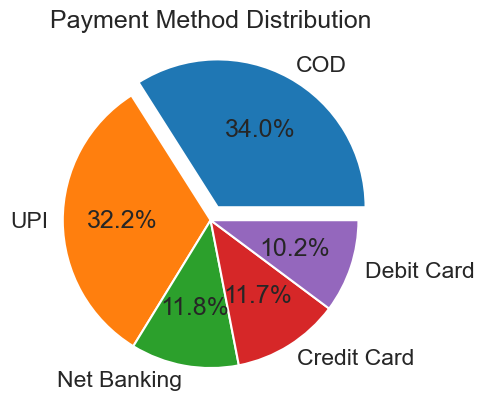

In [238]:
explode = (0.1,0,0,0,0)
most_pay.plot(kind='pie', autopct='%1.1f%%',explode=explode)
plt.title('Payment Method Distribution')
plt.ylabel("")
plt.show()

## -Discount VS Profit

Text(0.5, 1.0, 'Discount vs Profit')

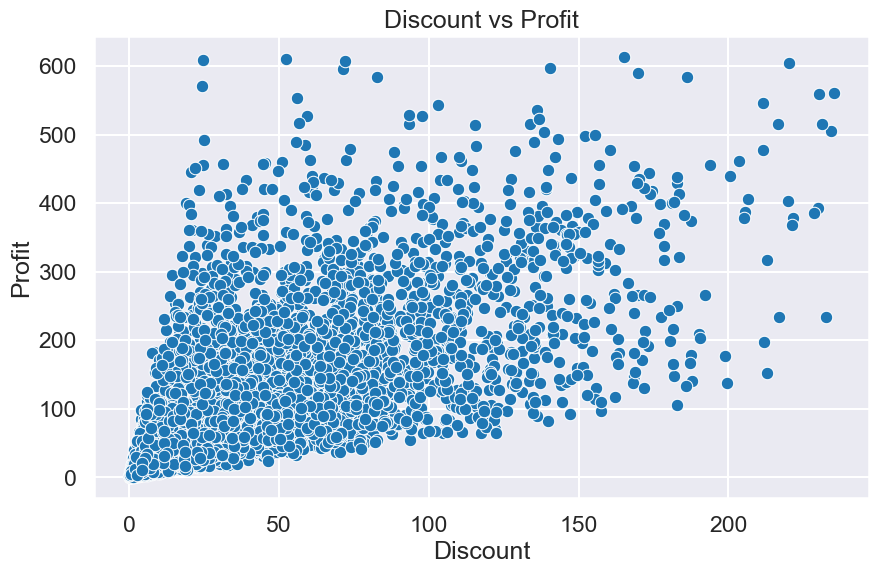

In [162]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_clean['Discount'], y=df_clean['Profit'])
plt.title('Discount vs Profit')

## -Profit Matrgin

In [172]:
Profit_category=df_clean.groupby('Category')['Profit Margin'].mean().sort_values()
print(Profit_category)

Category
Home & Kitchen    0.146799
Clothing          0.147778
Sports            0.147788
Beauty            0.148995
Books             0.150784
Unknown           0.150803
Electronics       0.150822
Toys              0.152337
Name: Profit Margin, dtype: float64


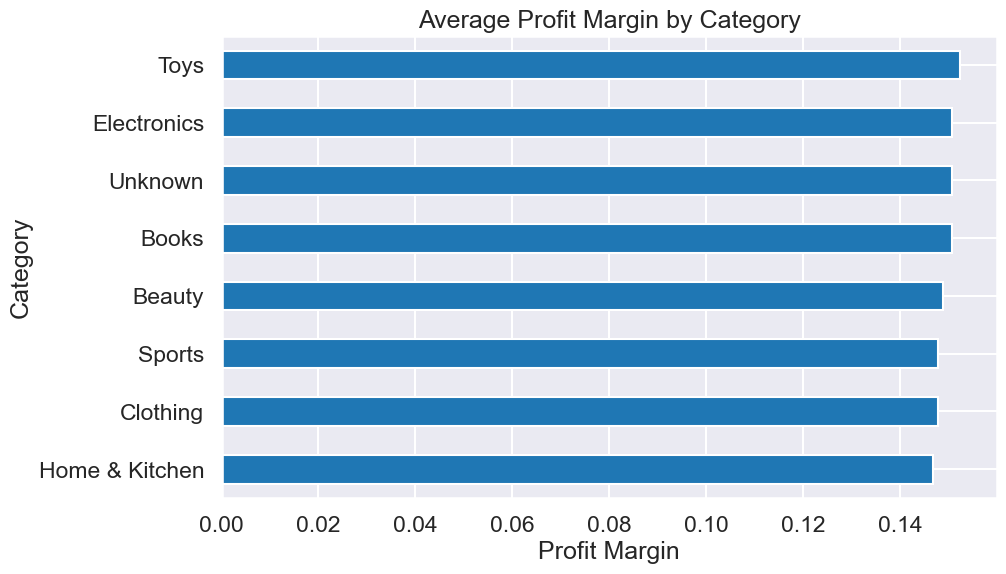

In [174]:
Profit_category.plot(kind='barh',figsize=(10,6))
plt.title('Average Profit Margin by Category')
plt.xlabel('Profit Margin')
plt.show()

## -Top Buyers

In [182]:
top_customers = df_clean.groupby("Customer Name")['Net Sales'].sum().sort_values(ascending=False).head(10)
top_customers

Customer Name
Unknown             6980.037178
Daniel Smith        4509.897638
Robert Smith        4403.392345
Jasmine Johnson     3640.422605
John Smith          3633.395451
Joshua Rodriguez    3422.853747
Jennifer Davis      3369.999272
Ashley Roberts      3288.780972
Sarah Wilson        3205.459479
Sarah Shelton       3128.310647
Name: Net Sales, dtype: float64

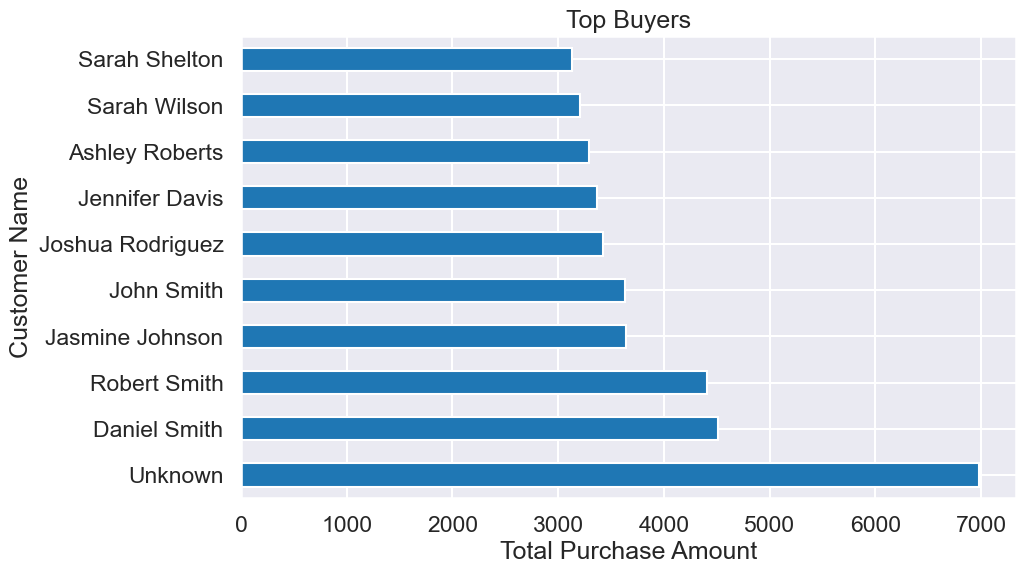

In [178]:
top_customers.plot(kind='barh',figsize=(10,6))
plt.title('Top Buyers')
plt.xlabel('Total Purchase Amount')
plt.show()

## -Most preferred Payment Method by Region

In [180]:
best_pay=df_clean.groupby(['Region', 'Payment Method']).size().unstack()
best_pay

Payment Method,COD,Credit Card,Debit Card,Net Banking,UPI
Region,,,,,
Central,351,106,98,114,349
East,343,119,103,123,308
North,317,121,105,121,321
South,330,106,111,124,314
West,359,135,93,109,320


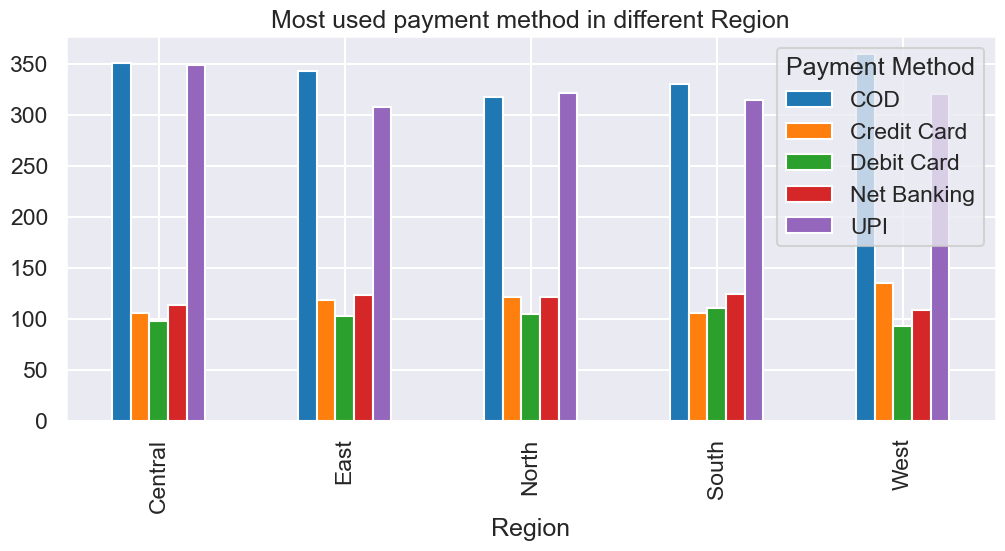

In [196]:
best_pay.plot(kind='bar',figsize=(12,5))
plt.title("Most used payment method in different Region")
plt.show()

## -Discount Effect on Profit

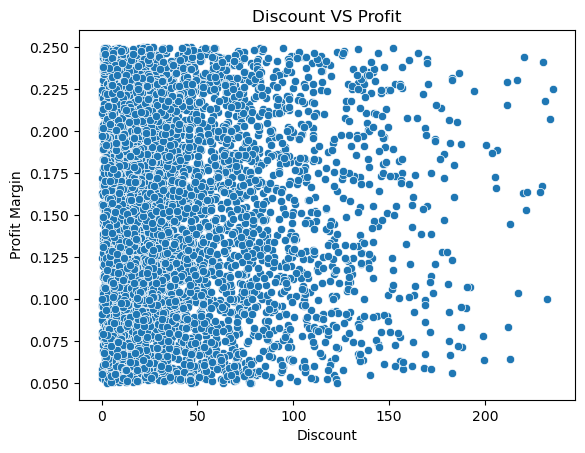

In [104]:
sns.scatterplot(x=df_clean['Discount'], y=df_clean['Profit Margin'])
plt.title("Discount VS Profit")
plt.show()

## - Average Profit by Region and Category

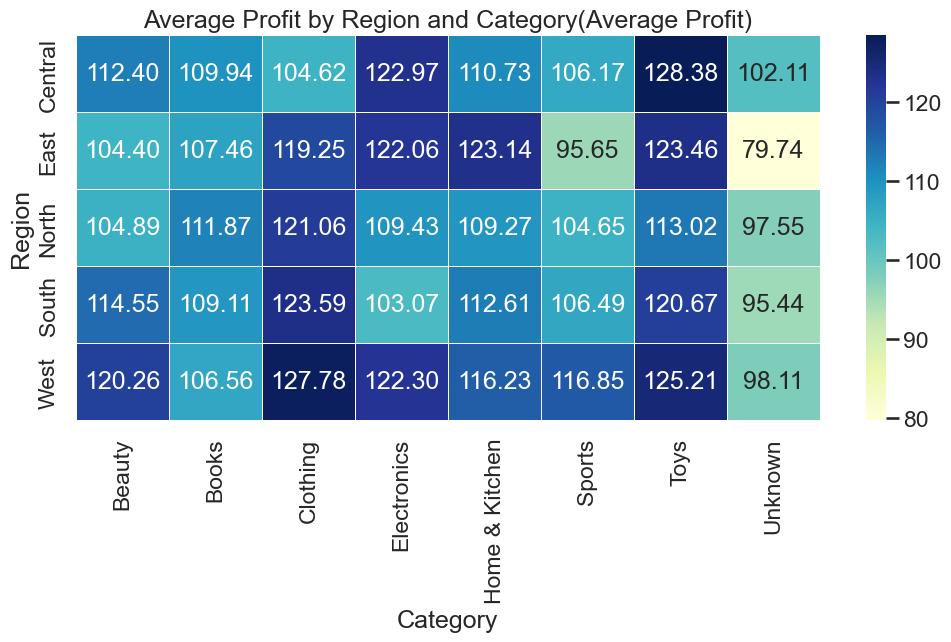

In [216]:
heatmap_data = df_clean.pivot_table(index='Region',
                                    columns='Category',
                                    values='Profit',
                                    aggfunc='mean')

plt.figure(figsize=(12,5))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu',linewidths=0.5)
plt.title('Average Profit by Region and Category(Average Profit)')
plt.show()

## -Low Profit detection

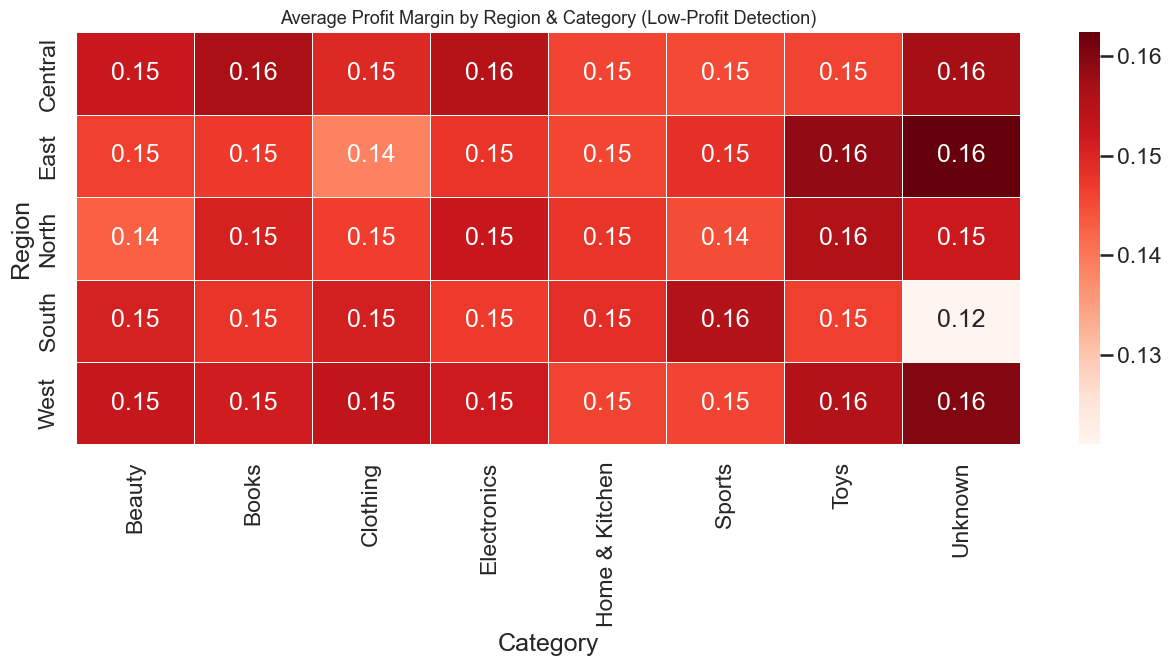

In [243]:
low_profit_map = df_clean.pivot_table(index='Region',
                                      columns='Category',
                                      values='Profit Margin',
                                      aggfunc='mean')

plt.figure(figsize=(13,7))
sns.heatmap(low_profit_map, annot=True, fmt=".2f", cmap="Reds", linewidths=0.5)
plt.title("Average Profit Margin by Region & Category (Low-Profit Detection)", fontsize=13)
plt.ylabel("Region")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# 5.Insights and Key Findings

-	Sales and profit both show fluctuating trends over time, suggesting seasonality or promotional periods.
-	Top-selling products contribute significantly to overall revenue, with a small set of items dominating the sales.
-	The West and Central regions generate the highest sales and profit, indicating stronger market demand in those areas.
-	Toys and Clothing are the best-performing categories in terms of net sales and profitability.
-	Cash on Delivery (COD) is the most used payment method, followed by UPI, indicating a preference for flexible payment options among customers.
-	There is a negative correlation between high discounts and profit, showing that excessive discounting reduces profitability.
-	The (Home and Kitchen) and Clothing categories have lower average profit margins compared to others.
-	Top buyers contribute disproportionately to total revenue, hinting at the presence of loyal or bulk-purchasing customers.
-	The preferred payment method varies by region, with UPI more common in some areas and COD dominating in others.
-	Heatmap of profit across region and category shows where to focus for improving profit – East Region in sports have very low average profits.
-	Low-profit detection heatmaps highlight specific region-category combinations (e.g., Cloathing in East) that consistently underperform.

# 6. Conclusion

 The Amazon Sales project provided valuable insights into customer behavior, regional trends, and category performance. It highlights how key business areas—like top-selling products, payment preferences, and regional profit margins—can drive strategic decisions. Using SQL for data cleaning and Python for analysis and visualization, this project demonstrates a complete data analytics pipeline from raw data to actionable insights. The findings emphasize the importance of optimizing discount strategies and focusing on high-performing product segments to maximize overall profitability.
	

In [247]:
df_clean.to_csv("amazon_sales_cleaned(jupyter).csv", index=False)